# Dominant Colours Extraction from an Image

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
img = cv2.imread("Datasets/image1.jpg")

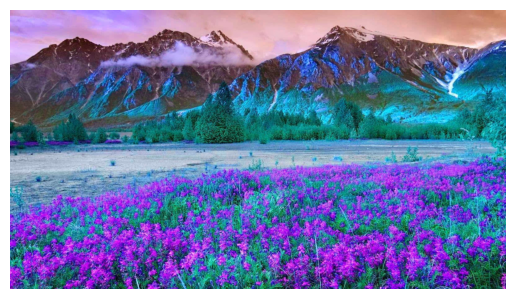

In [5]:
plt.imshow(img)
plt.axis("off")
plt.show()

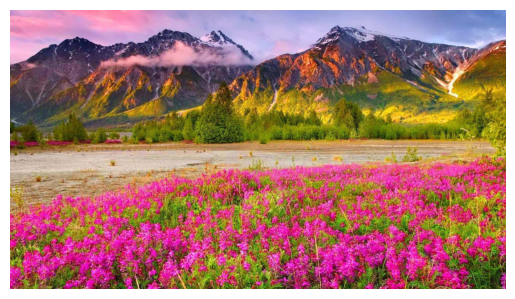

In [6]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

In [58]:
img.shape

(900, 1600, 3)

In [7]:
X = img.reshape((-1,3))
X.shape

(1440000, 3)

In [9]:
k = 7
kmeans_model = KMeans(n_clusters=k)

In [11]:
kmeans_model.fit(X)

C:\Users\Luvkush\anaconda3\envs\ML_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [13]:
centroids = kmeans_model.cluster_centers_
centroids

array([[176.91822203,  49.00733786,  84.84801456],
       [141.84243146, 124.81821391,  31.82875218],
       [231.38880504,  66.57710701, 160.20397612],
       [ 86.03016976,  70.78957858,  18.28281843],
       [198.12800674, 171.10364689, 201.7471947 ],
       [201.3638813 , 153.81592354,  91.70143726],
       [ 79.49418721,  64.50959531,  81.47668587]])

In [14]:
type(centroids)

numpy.ndarray

In [16]:
colors = np.array(centroids, dtype = 'uint8')
colors

array([[176,  49,  84],
       [141, 124,  31],
       [231,  66, 160],
       [ 86,  70,  18],
       [198, 171, 201],
       [201, 153,  91],
       [ 79,  64,  81]], dtype=uint8)

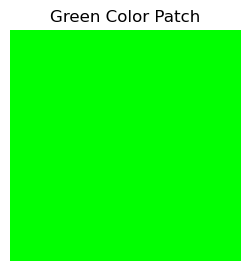

In [25]:
# Creating a test patch of Green color - (50, 50, 3)
plt.figure(figsize = (3,3))
green_matrix = np.zeros((50, 50, 3), dtype = 'uint8')
green_matrix[:, :, 1] = 255
plt.imshow(green_matrix)
plt.title("Green Color Patch")
plt.axis("off")
plt.show()

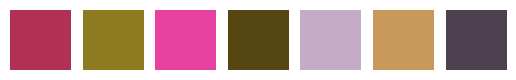

In [32]:
# Creating a color patch  "colors" matrix

i = 1
for color in colors:
    plt.subplot(1, k, i)   # 1 row, k columns, ith figure
    i = i + 1
    color_matrix = np.zeros((100, 100, 3), dtype = 'uint8')
    color_matrix[:, :, :] = color
    plt.imshow(color_matrix)
    plt.axis("off")

### Repainting images with dominant colours - Basic Segmentation based on similar color regions

In [47]:
colors[4]

array([198, 171, 201], dtype=uint8)

In [34]:
print(colors)

[[176  49  84]
 [141 124  31]
 [231  66 160]
 [ 86  70  18]
 [198 171 201]
 [201 153  91]
 [ 79  64  81]]


In [35]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3, 4, 5, 6])

In [36]:
kmeans_model.labels_.shape

(1440000,)

In [37]:
newImg = np.zeros_like(X)
newImg.shape

(1440000, 3)

In [56]:
for i in range(newImg.shape[0]):
    label = kmeans_model.labels_[i]
    newImg[i] = colors[label]

In [57]:
newImg

array([[198, 171, 201],
       [198, 171, 201],
       [198, 171, 201],
       ...,
       [231,  66, 160],
       [176,  49,  84],
       [176,  49,  84]], dtype=uint8)

In [59]:
newImg = newImg.reshape(img.shape)

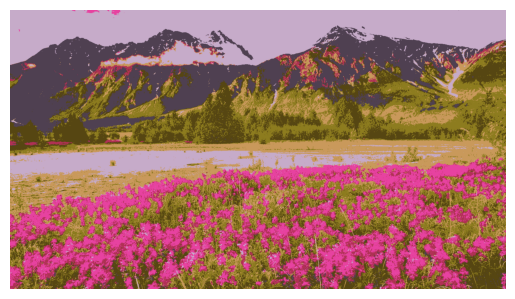

In [60]:
plt.imshow(newImg)
plt.axis("off")
plt.show()

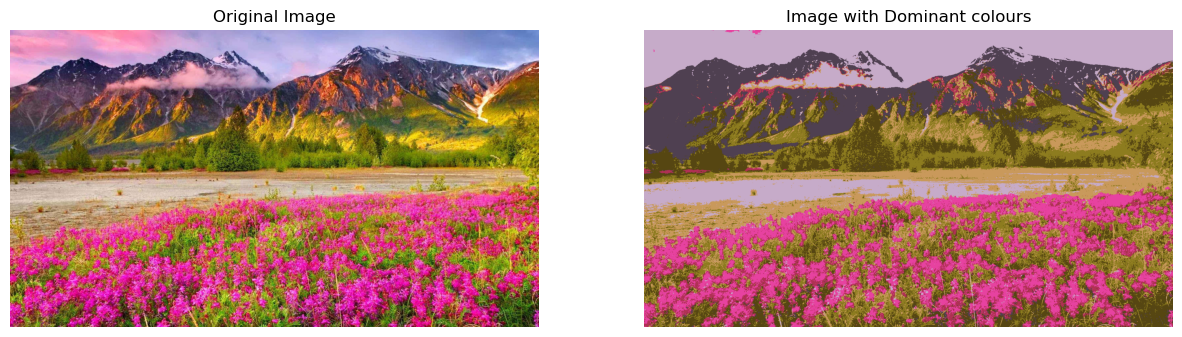

In [69]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize = (15, 14))
axes[0].imshow(img)
axes[0].title.set_text("Original Image")
axes[0].axis("off")

axes[1].imshow(newImg)
axes[1].title.set_text("Image with Dominant colours")
axes[1].axis("off")
plt.show()